In [1]:
# we can use sklearn to get the data!
from sklearn.datasets import load_digits
# cross validation score:
from sklearn.model_selection import cross_val_score
# numpy and matplotlib:
import numpy as np
import matplotlib.pyplot as plt

## Dataset Preperation:

In [2]:
# load the sklearn MNIST dataset:
mnist = load_digits()

In [3]:
X = mnist.data
Y = mnist.target

In [4]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


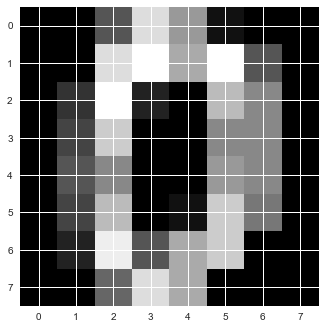

In [10]:
plt.style.use('seaborn')
# we see that the image is 64 = 8X8 image
plt.imshow(X[0].reshape((8,8)),cmap = 'gray')
plt.show()

In [9]:
print(Y[0])

0


4


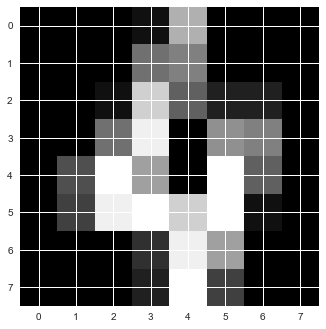

In [12]:
plt.imshow(X[4].reshape((8,8)),cmap = 'gray')
print(Y[4])
plt.show()

In [13]:
# in RGB image, we have 3 channels (one for each of R,G and B) and each have 255 values
# in gray scale image, we have only one channel and a scale of 0 to 15 which represent the shades
# of gray. 0: black and 15: white
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


we see that the values are discrete.So, we'll use multinomial naive bayes.
## Train models:

In [14]:
# we'll compare multinomial naive bayes and Gaussian naive bayes:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [15]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [16]:
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB()

In [17]:
# see the scores:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [18]:
# hence multinomial naive bayes gives a higher accuracy.
# we can also see the cross validation score:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10)

array([0.85555556, 0.93888889, 0.91111111, 0.78333333, 0.87222222,
       0.85      , 0.97222222, 0.94413408, 0.80446927, 0.86592179])

In [19]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

In [20]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10)

array([0.76111111, 0.81666667, 0.90555556, 0.68333333, 0.73888889,
       0.83888889, 0.86666667, 0.86592179, 0.82681564, 0.81005587])

In [21]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [ ]:
# this is beacuse the features are discrete